In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from my_func_pkg import *

In [3]:
b = yf.download('GC=F', interval='1D')
b.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [4]:
b

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...,...
5998,2024-07-29,2377.300049,2377.300049,2377.300049,2377.300049,2377.300049,126409
5999,2024-07-30,2380.899902,2409.300049,2373.800049,2405.000000,2405.000000,25944
6000,2024-07-31,2407.100098,2447.600098,2402.800049,2426.500000,2426.500000,1313
6001,2024-08-01,2446.699951,2455.100098,2430.399902,2435.000000,2435.000000,690


In [5]:
bcolse = b.Close.values

In [6]:
walk_len = 120

In [7]:
espf = exp_smooth_predict_final(bcolse, walk_len)

In [8]:
befc = boundary_exp_fit_curve(bcolse, walk_len, 1)

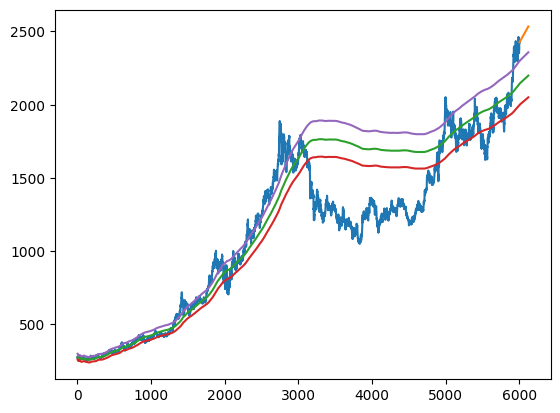

In [9]:
plt.plot(bcolse)
plt.plot(espf)
plt.plot(befc)

In [10]:
#espf[-walk_len:]

In [11]:
#befc[-walk_len:, :]

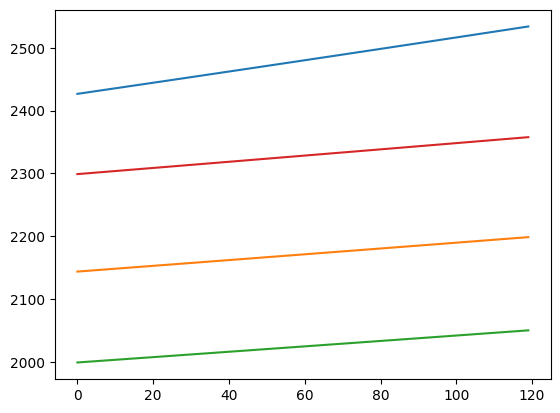

In [12]:
plt.plot(espf[-walk_len:])
plt.plot(befc[-walk_len:, :])

In [13]:
range_gold = (
    min(np.min(befc[-walk_len:, :]), np.min(espf[-walk_len:])),
    max(np.max(befc[-walk_len:, :]), np.max(espf[-walk_len:])))

In [14]:
range_gold

(1999.0264337873205, 2533.8194628468855)

In [15]:
base = np.mean([np.mean(befc[-walk_len:, :]), np.mean(espf[-walk_len:])])

In [16]:
base

2327.1880162140933

In [17]:
besc = boundary_exp_smooth_curve2(bcolse, 120)

C:\Users\ADMIN\PycharmProjects\clean_project\my_func_pkg.py:326: RuntimeWarning: Mean of empty slice
  base.append(numpy.nanmean(col))
C:\Users\ADMIN\PycharmProjects\clean_project\my_func_pkg.py:327: RuntimeWarning: All-NaN axis encountered
  upper.append(numpy.nanmax(col))
C:\Users\ADMIN\PycharmProjects\clean_project\my_func_pkg.py:328: RuntimeWarning: All-NaN axis encountered
  lower.append(numpy.nanmin(col))


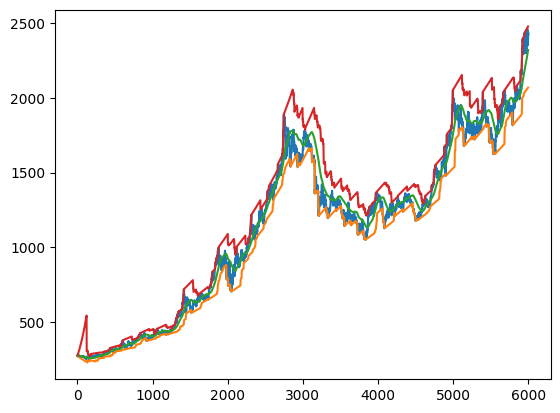

In [18]:
plt.plot(bcolse)
plt.plot(besc)

In [19]:
besc[-1]

array([2068.25247918, 2319.96006517, 2477.16475118])

In [20]:
bescp = boundary_exp_smooth_curve_predict(bcolse, walk_len, walk_len)

C:\Users\ADMIN\PycharmProjects\clean_project\my_func_pkg.py:326: RuntimeWarning: Mean of empty slice
  base.append(numpy.nanmean(col))
C:\Users\ADMIN\PycharmProjects\clean_project\my_func_pkg.py:327: RuntimeWarning: All-NaN axis encountered
  upper.append(numpy.nanmax(col))
C:\Users\ADMIN\PycharmProjects\clean_project\my_func_pkg.py:328: RuntimeWarning: All-NaN axis encountered
  lower.append(numpy.nanmin(col))


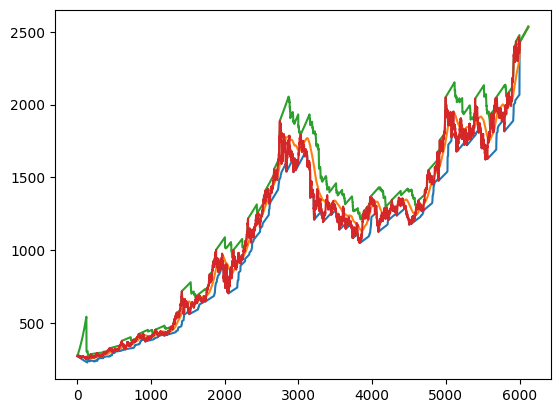

In [21]:
plt.plot(bescp)
plt.plot(bcolse)

In [22]:
range_gold2 = (np.nanmin(bescp[-walk_len:, :]), np.nanmax(bescp[-walk_len:, :]))

In [23]:
range_gold2

(2424.4156155515548, 2536.0831943128314)

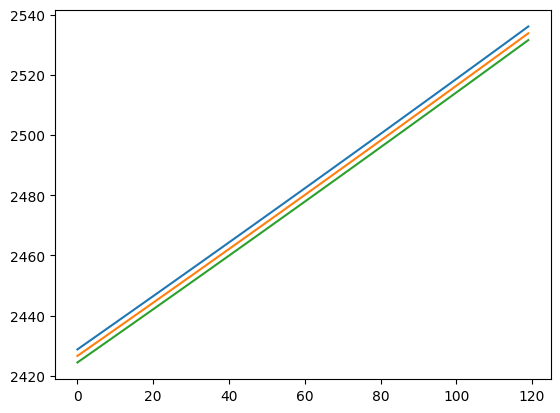

In [24]:
plt.plot(bescp[-walk_len:, :])